# Исследование надежности заемщиков.

## Описание проекта

Кредитному отделу банка нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Для этого имеется статистика о платёжеспособности клиентов.
Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

__Описание данных:__
- children — количество детей в семье
- days_employed — общий трудовой стаж в днях
- dob_years — возраст клиента в годах
- education — уровень образования клиента
- education_id — идентификатор уровня образования
- family_status — семейное положение
- family_status_id — идентификатор семейного положения
- gender — пол клиента
- income_type — тип занятости
- debt — имел ли задолженность по возврату кредитов
- total_income — ежемесячный доход
- purpose — цель получения кредита

## Импорт библиотек

In [ ]:
# Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt

## Обзор данных

Извлечение данных и просмотр информации о них.

In [2]:
data = pd.read_csv('datasets/data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [3]:
# Прсомотр первых 5 строк с данными
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


In [4]:
# Определение количества пропущенных значений
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

Пропуски обнаружены в двух столбцах days_employed и total_income.

In [5]:
# Вычисление доли пустых значений
data.isna().mean()

children            0.000000
days_employed       0.100999
dob_years           0.000000
education           0.000000
education_id        0.000000
family_status       0.000000
family_status_id    0.000000
gender              0.000000
income_type         0.000000
debt                0.000000
total_income        0.100999
purpose             0.000000
dtype: float64

Доля пропусков в столбцах days_employed и total_income составляет 10%.

## Предобработка данных.

В данном разделе будет проведено выявление дубликатов и обследование значений данных по столбцам.

### Поиск явных дубликатов и их удаление

In [6]:
# Определение количества явных дубликатов
data.duplicated().sum()

54

In [7]:
# удаление явных дубликатов
data = data.drop_duplicates().reset_index(drop=True)

In [8]:
data.duplicated().sum()

0

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21471 entries, 0 to 21470
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21471 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21471 non-null  int64  
 3   education         21471 non-null  object 
 4   education_id      21471 non-null  int64  
 5   family_status     21471 non-null  object 
 6   family_status_id  21471 non-null  int64  
 7   gender            21471 non-null  object 
 8   income_type       21471 non-null  object 
 9   debt              21471 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21471 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


### Обследование значений данных по столбцам

#### Столбец children просмотр значений.

In [10]:
# Просмотр уникальных значений и их количества в столбце children 
data['children'].value_counts()

 0     14107
 1      4809
 2      2052
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

В столбце children есть неправильное значение -1 и аномальное значение 20. Скорее всего значение -1 это ошибка набора и его можно исправить на 1. Значение 20 выбивается из распределения количества заёмщиков по количеству детей, и вероятнее всего связано с ошибкой набора. Это значение можно отнести к значению 2 детей.

In [11]:
# Исправление значений -1 в столбце children на 1
data.loc[data['children'] == -1, ['children']]= 1
data[data['children'] == -1]['children'].count()

0

In [12]:
# Исправление значений 20 в столбце children на 2
data.loc[data['children'] == 20, ['children']] = 2
data[data['children'] == 20]['children'].count()

0

In [13]:
# Проверка распределения по количеству детей после исправлений аномальных данных
data['children'].value_counts()

0    14107
1     4856
2     2128
3      330
4       41
5        9
Name: children, dtype: int64

#### Столбец days_employed просмотр значений

Для обзора данных посчитаем стаж работы в годах. 

In [14]:
# Создание столбца year_employed стаж работы в годах
data['year_employed'] = data['days_employed'] / 365

Посмотрим статистическое описание данных в столбце year_employed.

In [15]:
data['year_employed'].describe()

count    19351.000000
mean       172.730131
std        385.828252
min        -50.380685
25%         -7.527188
50%         -3.296903
75%         -0.797523
max       1100.699727
Name: year_employed, dtype: float64

Из описательной статистики видно 2 аномалии, первая отрицательные значения стажа и вторая, аномальное значение максимальног стажа 1100 лет. Для более детального рассмотрения построим гистограмму по стажу работы в годах.

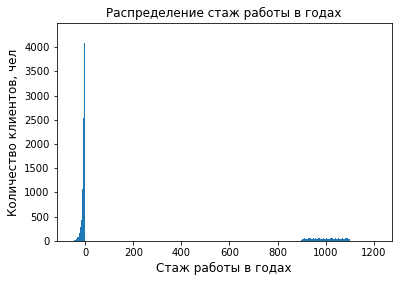

In [16]:
plt.hist(data['year_employed'], bins=500,
         range=(data['year_employed'].min() * 1.1, data['year_employed'].max() * 1.1))
plt.xlabel('Стаж работы в годах', fontsize = 12)
plt.ylabel('Количество клиентов, чел', fontsize = 12)
plt.title('Распределение стаж работы в годах', fontsize = 12);

Из гистограммы видно, что данные в столбце days imployed имеют либо отрицательные значения, либо значения находящиеся в области 1000 лет, что является аномальным. <br>
Отрицательные значения стажа работы могли возникнуть в результате ошибки. Ошибка может быть связана с вычислением общего трудового стажа, который вычисляется вычитанием из текущей даты даты начала трудового стажа. Если вычитание производилось наоборот из даты начала трудового стажа вычитали текущую дату, то это могло привести к появлению отрицательных значений. <br>
Исправим отрицательные значения стажа домножив их на -1.

In [17]:
data.loc[data['year_employed'] <= 0, 'year_employed'] = -1 * data[data['year_employed'] <= 0]['year_employed']

Аномальные значения в области 1000 могут быть связаны с тем, что это значения не в днях, а в часах. Если разделить 1000 на 24 часа, то получится значение 41, что уже похоже на стаж в годах.
Об этих аномалиях нужно проинформировать подразделение осуществлявшее подготовку данных.<br>
Разделим значения стажа в области 1000 на 24 и посмотрим их распределение.

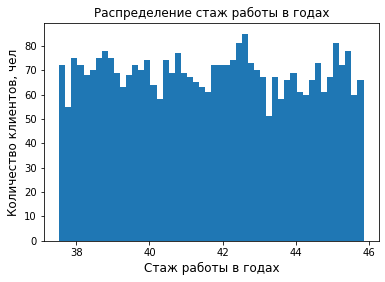

In [18]:
plt.hist(data[data['year_employed'] > 800]['year_employed'] / 24, bins=50)
plt.xlabel('Стаж работы в годах', fontsize = 12)
plt.ylabel('Количество клиентов, чел', fontsize = 12)
plt.title('Распределение стаж работы в годах', fontsize = 12);

Получаются значения стажа от 38 до 46 лет.

Данные в области значений 1000 разделим на 24 и посмотрим распределение.

In [19]:
year_employed = data['year_employed'].to_frame()

In [20]:
year_employed.loc[year_employed['year_employed'] > 800, 'year_employed'] = year_employed[year_employed['year_employed'] > 800]['year_employed'] / 24

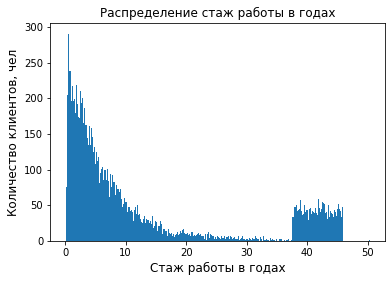

In [21]:
plt.hist(year_employed, bins=500)
plt.xlabel('Стаж работы в годах', fontsize = 12)
plt.ylabel('Количество клиентов, чел', fontsize = 12)
plt.title('Распределение стаж работы в годах', fontsize = 12);

Замененные значения привели к искажению гистограммы в значениях от 38 до 46 появился выброс. Это означает, что наша гипотеза о делении аномальных значений в области 1000 на 24 неверна. C обнаруженными аномалиями в столбце days_employed необходимо разбираться совместно с отделом по выгрузке данных.<br>
Так как в данном исследовании данные из столбца days_employed не будут использоваться оставим эти данные без изменений.

#### Столбец total_income просмотр значений.

Проведём расчёт статистических показателей значений столбца total_income

In [22]:
data['total_income'].describe()

count    1.935100e+04
mean     1.674223e+05
std      1.029716e+05
min      2.066726e+04
25%      1.030532e+05
50%      1.450179e+05
75%      2.034351e+05
max      2.265604e+06
Name: total_income, dtype: float64

Полученные значения показывают, что значения находятся в диапазоне от 21 тыс. руб до 2,27 млн. руб, среднее значение составляе 150 тыс. руб, что соответствует возможному разбросу доходов граждан.

Для проверки распределения дохода клиентов банка построим гистограмму ежемесячного дохода.

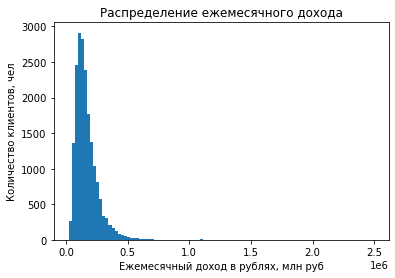

In [23]:
plt.hist(data['total_income'], bins=100,
         range=(data['total_income'].min() * 1.1, data['total_income'].max() * 1.1))
plt.title('Распределение ежемесячного дохода')
plt.xlabel('Ежемесячный доход в рублях, млн руб')
plt.ylabel('Количество клиентов, чел');

Из графика видно, что каких-либо аномальных значений в гистограмме ежемесячного дохода не наблюдается.

#### Столбец incom_type просмотр значений.

Рассчитаем количество клиентов банка по типу дохода.

In [24]:
data['income_type'].value_counts()

сотрудник          11091
компаньон           5080
пенсионер           3837
госслужащий         1457
безработный            2
предприниматель        2
студент                1
в декрете              1
Name: income_type, dtype: int64

В полученных данных, каких-либо аномалий не видно.

####  Столбцы family_status и family_status_id просмотр значений.

In [25]:
# Просмотр уникальных значений и их количества в столбцах family_status и family_status_id
data['family_status'].value_counts()

женат / замужем          12344
гражданский брак          4163
Не женат / не замужем     2810
в разводе                 1195
вдовец / вдова             959
Name: family_status, dtype: int64

In [26]:
data['family_status_id'].value_counts()

0    12344
1     4163
4     2810
3     1195
2      959
Name: family_status_id, dtype: int64

В столбце family_status и family_status_id каких-либо аномалий не обнаружено. 

#### Столбцы education и education_id просмотр значений.

In [27]:
data['education'].value_counts()

среднее                13705
высшее                  4710
СРЕДНЕЕ                  772
Среднее                  711
неоконченное высшее      668
ВЫСШЕЕ                   273
Высшее                   268
начальное                250
Неоконченное высшее       47
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
НАЧАЛЬНОЕ                 17
Начальное                 15
ученая степень             4
Ученая степень             1
УЧЕНАЯ СТЕПЕНЬ             1
Name: education, dtype: int64

В столбце education присутствуют неявные дубликаты связанные с регистром букв.

In [28]:
# приведение значений к строчному регистру
data['education'] = data['education'].str.lower()

In [29]:
# Просмотр уникальных значений и их количества
data['education'].value_counts()

среднее                15188
высшее                  5251
неоконченное высшее      744
начальное                282
ученая степень             6
Name: education, dtype: int64

In [30]:
data['education_id'].value_counts()

1    15188
0     5251
2      744
3      282
4        6
Name: education_id, dtype: int64

В столбцах education_id и education после преобразования неявных дубликатов, каких-либо аномалий не обнаружено.

####  Столбец dob_yeras просмотр значений.

In [31]:
dob_years = data['dob_years'].value_counts().sort_index()
display(dob_years)

0     101
19     14
20     51
21    111
22    183
23    253
24    264
25    357
26    408
27    493
28    503
29    544
30    538
31    559
32    509
33    581
34    601
35    616
36    554
37    536
38    597
39    572
40    607
41    606
42    596
43    512
44    545
45    497
46    473
47    477
48    537
49    508
50    513
51    448
52    484
53    459
54    476
55    443
56    484
57    456
58    456
59    443
60    374
61    354
62    349
63    269
64    262
65    194
66    182
67    167
68     99
69     85
70     65
71     58
72     33
73      8
74      6
75      1
Name: dob_years, dtype: int64

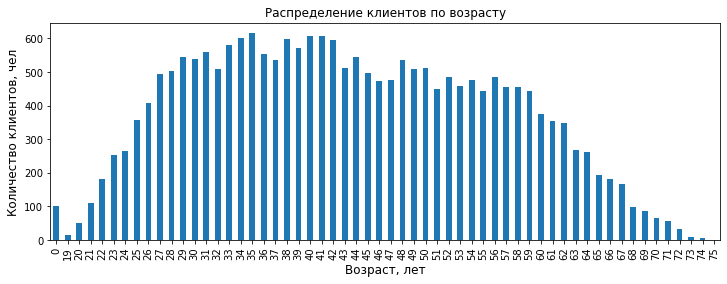

In [32]:
plt.figure(figsize=(12, 4))
dob_years.plot(kind='bar')
plt.title('Распределение клиентов по возрасту', fontsize = 12)
plt.xlabel('Возраст, лет', fontsize = 12)
plt.ylabel('Количество клиентов, чел', fontsize = 12);

В столбце dob_years есть аномальные значения возраста равные 0 в количестве 101 значение.

Так как в данном исследовании не планируется проверять зависимость задолженности от возраста данные можно оставить

#### Столбец gender (пол) просмотр значений.

In [33]:
data['gender'].value_counts()

F      14189
M       7281
XNA        1
Name: gender, dtype: int64

In [34]:
data[data['gender'] == 'XNA']

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,year_employed
10690,0,-2358.600502,24,неоконченное высшее,2,гражданский брак,1,XNA,компаньон,0,203905.157261,покупка недвижимости,6.461919


В данных есть 1 аномальное значение XNA. Так как в данном исследование не планируется изучать зависимость задолженности от пола, то это строку можно оставить.

#### Столбец debt просмотр значений.

In [35]:
data['debt'].value_counts()

0    19730
1     1741
Name: debt, dtype: int64

В столбце debt присутствуют 2 значения 0 - нет задолженности, 1 - есть задолженность. Каких-либо аномалий в данных нет.

#### Столбец purpose просмотр значений.

In [36]:
data['purpose'].value_counts()

свадьба                                   793
на проведение свадьбы                     773
сыграть свадьбу                           769
операции с недвижимостью                  675
покупка коммерческой недвижимости         662
покупка жилья для сдачи                   652
операции с жильем                         652
операции с коммерческой недвижимостью     650
покупка жилья                             646
жилье                                     646
покупка жилья для семьи                   638
строительство собственной недвижимости    635
недвижимость                              633
операции со своей недвижимостью           627
строительство жилой недвижимости          625
покупка недвижимости                      621
покупка своего жилья                      620
строительство недвижимости                619
ремонт жилью                              607
покупка жилой недвижимости                606
на покупку своего автомобиля              505
заняться высшим образованием      

В столбце purpose присутствует большое количество различных значений. Перед исследованием нужно провести категоризацию этих значений, что будет сделано в разделе категоризация.

### Заполнение пропусков

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21471 entries, 0 to 21470
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21471 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21471 non-null  int64  
 3   education         21471 non-null  object 
 4   education_id      21471 non-null  int64  
 5   family_status     21471 non-null  object 
 6   family_status_id  21471 non-null  int64  
 7   gender            21471 non-null  object 
 8   income_type       21471 non-null  object 
 9   debt              21471 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21471 non-null  object 
 12  year_employed     19351 non-null  float64
dtypes: float64(3), int64(5), object(5)
memory usage: 2.1+ MB


In [38]:
# Расчёт количества не заполненных значений в столбце total_income
print(data['total_income'].isna().sum())
print(round((data['total_income'].isna().sum() / len(data)) * 100, 1), '%')

2120
9.9 %


В столбце total income присутствует 9,9 % незаполненых значений. Заменим пустые значения медианой в зависимости от типа занятости.

In [39]:
data['total_income'] = data['total_income'].fillna(
    data.groupby('income_type')['total_income'].transform("median")
)

Посмотрим, как изменилась гистограмма после замены пустых значений.

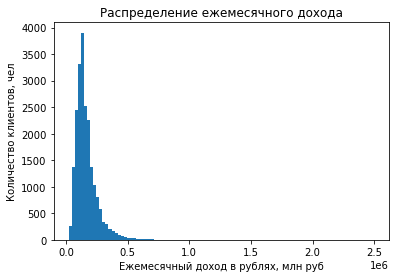

In [40]:
plt.hist(data['total_income'], bins=100,
         range=(data['total_income'].min() * 1.1, data['total_income'].max() * 1.1))
plt.title('Распределение ежемесячного дохода')
plt.xlabel('Ежемесячный доход в рублях, млн руб')
plt.ylabel('Количество клиентов, чел');

На гистограмме появились пики в значениях медианы.

### Изменение типов данных.

Значения в столбце total_income имеют вещественный тип. Данные после запятой имеют значение копеек, которые имеют очень малую долю от сумм доходов. Для удобства расчётов значение в этом столбце лучше перевести из вещественного типа данных в целочисленный.

In [41]:
# Изменение типа данных столбца total_income на тип int
data['total_income'] = data['total_income'].astype('int')

### Удаление дубликатов.

In [42]:
data.duplicated().sum()

17

В данных появились еще 17 дубликатов. Такое возможно, так как данные уже изменялись, поэтому удалять их не будем.

### Формирование дополнительных датафреймов словарей, декомпозиция исходного датафрейма.

Создание словаря по колонкам education_id, education

In [43]:
education_id_dict = data[['education_id', 'education']]

In [44]:
# Удаление дубликатов из справочника education_id_table
education_id_dict = education_id_dict.drop_duplicates()
education_id_dict = education_id_dict.set_index('education_id')
display(education_id_dict)

,education
education_id,
0,высшее
1,среднее
2,неоконченное высшее
3,начальное
4,ученая степень


In [45]:
# Удаление столбца education из основной таблицы данных data
del data['education']

Создание словаря по колонкам family_status_id, family_status

In [46]:
family_status_id_dict = data[['family_status_id', 'family_status']]
family_status_id_dict = family_status_id_dict.drop_duplicates()
family_status_id_dict = family_status_id_dict.set_index('family_status_id')
display(family_status_id_dict)

,family_status
family_status_id,
0,женат / замужем
1,гражданский брак
2,вдовец / вдова
3,в разводе
4,Не женат / не замужем


In [47]:
# Удаление столбца family_status
del data['family_status']

### Категоризация 

#### Категоризация дохода.

Для анализа зависимости задолженности от дохода необходимо провести категоризацию дохода.
Вначале создадим справочник категория дохода - описание

In [48]:
category_income_value = [
    ['E', '          0 - 30 тыс руб'],
    ['D', ' 30 тыс руб - 50 тыс руб'],
    ['C', ' 50 тыс руб - 200 тыс руб'],
    ['B', '200 тыс руб - 1 млн руб'],
    ['A', '  1 млн руб и более']
]
category_income_value_descr = pd.DataFrame(data=category_income_value, columns=['total_income_category', 'description'])

In [49]:
display(category_income_value_descr)

,total_income_category,description
0,E,0 - 30 тыс руб
1,D,30 тыс руб - 50 тыс руб
2,C,50 тыс руб - 200 тыс руб
3,B,200 тыс руб - 1 млн руб
4,A,1 млн руб и более


Проведем категоризацию по столбцу total_income.

In [50]:
# Функция категоризации дохода
def incom_category (value_total_income):
    if 0 < value_total_income <= 30000:
        return('E')
    elif value_total_income <= 50000:
        return('D')
    elif value_total_income <= 200000:
        return('C')
    elif value_total_income <= 1000000:
        return('B')
    else:
        return('A')
# создание столбца с категорией дохода        
data['total_income_category'] = data['total_income'].apply(incom_category)

In [51]:
# проверка получившейся категоризации
data['total_income_category'].value_counts()

C    16032
B     5042
D      350
A       25
E       22
Name: total_income_category, dtype: int64

#### Категоризация целей кредита.

Проведём категоризацию по целям кредита. Из значений столбца purpose можно выделить 4 категории:
1) проведение свадьбы, 2) операции с недвижимостью 3) операции с автомобилем 4) получение образования

In [52]:
# Функция для категоризации значений столбца purpouse
def func_purpose_category (purpose):
    if 'свадьб' in purpose:
        return('проведение свадьбы')
    elif 'недвижимост' in purpose:
        return('операции с недвижимостью')
    elif 'жиль' in purpose:
        return('операции с недвижимостью')
    elif 'автомобил' in purpose:
        return('операции с автомобилем')
    elif 'образован' in purpose:
        return('получение образования')
    else:
        return('ошибка категоризации')
data['purpose_category'] = data['purpose'].apply(func_purpose_category)

In [53]:
# проверка получившейся категоризации
data['purpose_category'].value_counts()

операции с недвижимостью    10814
операции с автомобилем       4308
получение образования        4014
проведение свадьбы           2335
Name: purpose_category, dtype: int64

## Исследование данных, проверка гипотез

### Предисловие 

### Добавление к данным столбца 'debt_str' с значениями 'debt', 'no_debt'

In [54]:
data['debt'].value_counts()

0    19730
1     1741
Name: debt, dtype: int64

In [55]:
def debt_str (debt):
    if debt == 0:
        return('no_debt')
    elif debt == 1:
        return('debt')
    else:
        return('ошибка категоризации')
        
data['debt_str'] = data['debt'].apply(debt_str)
data['debt_str'].value_counts()

no_debt    19730
debt        1741
Name: debt_str, dtype: int64

### Гипотезы и описание метода их проверки

В данном разделе проверяются 4 гипотезы. Будет проверяться зависимость возврата кредита в срок от различных факторов:
1) от количества детей в семье
2) от семейного положения
3) от уровня дохода
4) от цели кредита

Проверяться гипотезы будут по сравнению долей клиентов с задолженностью и без задолженности при разных значениях категориальных признаков.
Для этого создаётся сводная таблица, в которой по строкам будут идти категориальные значения исследуемого признака, а по столбцам состояние задолженности есть задолженность, нет задолженности. В ячейках будут находится количество клиентов с выбранными признаками.
Затем будет вычисляться по категориальному значению в строке доля с задолженность и без задолженности.
Вычислинные доли будут сравниваться для различных категориальных признаков.

### Проверка гипотез о зависимости задолженности от различных факторов 

#### Количество детей в семье - задолженность

Создание сводной таблицы количества детей - состояния задолженности.

In [56]:
children_debt = data.pivot_table(index = 'children', columns = 'debt_str', values = 'debt', aggfunc = 'count')
display(children_debt)

debt_str,debt,no_debt
children,,
0,1063.0,13044.0
1,445.0,4411.0
2,202.0,1926.0
3,27.0,303.0
4,4.0,37.0
5,NaN,9.0


In [57]:
# замена значения NaN в столбце debt на 0
children_debt.loc[5, 'debt'] = 0
display(children_debt)

debt_str,debt,no_debt
children,,
0,1063.0,13044.0
1,445.0,4411.0
2,202.0,1926.0
3,27.0,303.0
4,4.0,37.0
5,0.0,9.0


Расчёт долей по состоянию задолженности в процентах для разных значений количества детей. 

In [58]:
# сумма значений с задолженностью и без задолженности
children_debt['sum'] = children_debt['debt'] + children_debt['no_debt']
# определение доли с задолженностью
children_debt['debt_ratio'] = (children_debt['debt'] / children_debt['sum']) * 100
children_debt['debt_ratio'] = round(children_debt['debt_ratio'], 1)
# определение доли без задолженности
children_debt['no_debt_ratio'] = (children_debt['no_debt'] / children_debt['sum']) * 100
children_debt['no_debt_ratio'] = round(children_debt['no_debt_ratio'], 1)
children_debt['sum_ratio'] = (children_debt['sum'] / children_debt['sum']) * 100
display(children_debt)

debt_str,debt,no_debt,sum,debt_ratio,no_debt_ratio,sum_ratio
children,,,,,,
0,1063.0,13044.0,14107.0,7.5,92.5,100.0
1,445.0,4411.0,4856.0,9.2,90.8,100.0
2,202.0,1926.0,2128.0,9.5,90.5,100.0
3,27.0,303.0,330.0,8.2,91.8,100.0
4,4.0,37.0,41.0,9.8,90.2,100.0
5,0.0,9.0,9.0,0.0,100.0,100.0


Из полученных значений видно, что клиенты без детей имеют меньшую задолженнсть, чем клиенты с детьми. Между двумя самыми многочисленными группами без детей и с 1 ребёнком разница между должниками составляет 1,7%. Группы с 2-5 детьми малочисленны и вместе составляют около 10%, разница между ними не такая значительная. Кроме этого полученные для них значения имеют большую ошибку по сравнению с двумя основными группами. Поэтому для модели кредитного скоринга, можно ввести другую категоризацию, есть дети или нет детей.

Создание таблицы наличие детей - задолженность

In [59]:
# создание строки нет детей
children_debt_no = children_debt.loc[0, ['debt', 'no_debt']]
display(children_debt_no)
# создание строки есть дети суммированием клиентов с детьми 
children_debt_yes = children_debt.loc[1:, ['debt', 'no_debt']].sum()
display(children_debt_yes)

debt_str
debt        1063.0
no_debt    13044.0
Name: 0, dtype: float64

debt_str
debt        678.0
no_debt    6686.0
dtype: float64

Создание дата-фрейма наличие детей задолженность.

In [60]:
children_debt_yes_no = [['нет детей', children_debt_no['debt'], children_debt_no['no_debt']], 
                        ['есть дети', children_debt_yes['debt'], children_debt_yes['no_debt']]]                        
print(type(children_debt_yes_no))
ch_debt_yes_no_df = pd.DataFrame(data=children_debt_yes_no, columns=['наличие детей', 'debt', 'no_debt'])
display(ch_debt_yes_no_df)

<class 'list'>


,наличие детей,debt,no_debt
0,нет детей,1063.0,13044.0
1,есть дети,678.0,6686.0


Расчет долей клиентов с задолженностью и без задолженности, по группам нет детей, есть дети.

In [61]:
ch_debt_yes_no_df['sum'] = ch_debt_yes_no_df['debt'] + ch_debt_yes_no_df['no_debt']
ch_debt_yes_no_df['debt_ratio'] = (ch_debt_yes_no_df['debt'] / ch_debt_yes_no_df['sum']) * 100
ch_debt_yes_no_df['debt_ratio'] = round(ch_debt_yes_no_df['debt_ratio'], 1)
ch_debt_yes_no_df['no_debt_ratio'] = (ch_debt_yes_no_df['no_debt'] / ch_debt_yes_no_df['sum']) * 100
ch_debt_yes_no_df['no_debt_ratio'] = round(ch_debt_yes_no_df['no_debt_ratio'], 1)
ch_debt_yes_no_df['sum_ratio'] = (ch_debt_yes_no_df['sum'] / ch_debt_yes_no_df['sum']) * 100
display(ch_debt_yes_no_df)

,наличие детей,debt,no_debt,sum,debt_ratio,no_debt_ratio,sum_ratio
0,нет детей,1063.0,13044.0,14107.0,7.5,92.5,100.0
1,есть дети,678.0,6686.0,7364.0,9.2,90.8,100.0


Из данной таблицы видно, что доля клиентов с задолженностью не имеющая детей составляет 7,5%, а доля клиентов с задолженнность имеющая детей составляет 9,2%. Разница составляет 1,7%, что можно учесть в модели кредитного скоринга.

#### Семейное положение - задолженность

Создание сводной таблицы семейное положение - наличие задолженности.

In [62]:
family_status_debt = data.pivot_table(index = 'family_status_id', columns = 'debt_str', values = 'debt', aggfunc = 'count')
display(family_status_debt)
# копирование таблицы количество детей - задолженность для обобщающей таблицы
family_status_debt_value = family_status_debt.copy()

debt_str,debt,no_debt
family_status_id,,
0,931,11413
1,388,3775
2,63,896
3,85,1110
4,274,2536


Расчёт долей наличия задолженностей в каждой категории семейного положения.

In [63]:
family_status_debt['sum'] = family_status_debt['debt'] + family_status_debt['no_debt']
family_status_debt['debt_ratio'] = round((family_status_debt['debt'] / family_status_debt['sum']) * 100, 1)
family_status_debt['no_debt_ratio'] = round((family_status_debt['no_debt'] / family_status_debt['sum']) * 100, 1)
family_status_debt['sum_ratio'] = (family_status_debt['sum'] / family_status_debt['sum']) * 100
display(family_status_debt)

debt_str,debt,no_debt,sum,debt_ratio,no_debt_ratio,sum_ratio
family_status_id,,,,,,
0,931,11413,12344,7.5,92.5,100.0
1,388,3775,4163,9.3,90.7,100.0
2,63,896,959,6.6,93.4,100.0
3,85,1110,1195,7.1,92.9,100.0
4,274,2536,2810,9.8,90.2,100.0


In [64]:
# Сортировка по столбцу debt_ratio по возрастанию
family_status_debt.sort_values(by='debt')

debt_str,debt,no_debt,sum,debt_ratio,no_debt_ratio,sum_ratio
family_status_id,,,,,,
2,63,896,959,6.6,93.4,100.0
3,85,1110,1195,7.1,92.9,100.0
4,274,2536,2810,9.8,90.2,100.0
1,388,3775,4163,9.3,90.7,100.0
0,931,11413,12344,7.5,92.5,100.0


Присоединение к расчитанной таблице по индексу family_status_id справочника значений категорий family статус. Сортировка по столбцу 'debt_ratio' по возрастанию.

In [65]:
family_status_debt_general = family_status_id_dict.merge(family_status_debt, on='family_status_id', how='right').sort_values(by='debt_ratio')
display(family_status_debt_general)

,family_status,debt,no_debt,sum,debt_ratio,no_debt_ratio,sum_ratio
family_status_id,,,,,,,
2,вдовец / вдова,63,896,959,6.6,93.4,100.0
3,в разводе,85,1110,1195,7.1,92.9,100.0
0,женат / замужем,931,11413,12344,7.5,92.5,100.0
1,гражданский брак,388,3775,4163,9.3,90.7,100.0
4,Не женат / не замужем,274,2536,2810,9.8,90.2,100.0


Из полученных значений в таблице семейное положение - наличие задолженности видно, что имеется зависимость наличия задолженности от семейного положения. Минимальное значение составляет 6,5 % у категории вдовец/вдова и максимальное 9,8% у категории не женат / не замужем.
Полученные значения по доле задолженностей в зависимости от семейного положения можно использовать для модели кредитного скоринга.

#### Уровень дохода - задолженность

Построение сводной таблицы категория дохода - наличие задолженности.

In [66]:
total_income_debt = data.pivot_table(index = 'total_income_category', columns = 'debt_str', values = 'debt', aggfunc = 'count')
display(total_income_debt)

debt_str,debt,no_debt
total_income_category,,
A,2,23
B,356,4686
C,1360,14672
D,21,329
E,2,20


In [67]:
total_income_debt['sum'] = total_income_debt['debt'] + total_income_debt['no_debt']
total_income_debt['debt_ratio'] = (total_income_debt['debt'] / total_income_debt['sum']) * 100
total_income_debt['debt_ratio'] = round(total_income_debt['debt_ratio'], 1)
total_income_debt['no_debt_ratio'] = (total_income_debt['no_debt'] / total_income_debt['sum']) * 100
total_income_debt['no_debt_ratio'] = round(total_income_debt['no_debt_ratio'])
total_income_debt['sum_ratio'] = (total_income_debt['sum'] / total_income_debt['sum']) * 100
display(total_income_debt)

debt_str,debt,no_debt,sum,debt_ratio,no_debt_ratio,sum_ratio
total_income_category,,,,,,
A,2,23,25,8.0,92.0,100.0
B,356,4686,5042,7.1,93.0,100.0
C,1360,14672,16032,8.5,92.0,100.0
D,21,329,350,6.0,94.0,100.0
E,2,20,22,9.1,91.0,100.0


Создание датафрейма с полученными значениями задолженности и с описанием категорий. Сортировка по столбцу debt_ratio по возрастанию.

In [68]:
total_income_debt_general = category_income_value_descr.merge(total_income_debt, on='total_income_category', how='right').sort_values(by='debt_ratio')
display(total_income_debt_general)

,total_income_category,description,debt,no_debt,sum,debt_ratio,no_debt_ratio,sum_ratio
3,D,30 тыс руб - 50 тыс руб,21,329,350,6.0,94.0,100.0
1,B,200 тыс руб - 1 млн руб,356,4686,5042,7.1,93.0,100.0
0,A,1 млн руб и более,2,23,25,8.0,92.0,100.0
2,C,50 тыс руб - 200 тыс руб,1360,14672,16032,8.5,92.0,100.0
4,E,0 - 30 тыс руб,2,20,22,9.1,91.0,100.0


В таблице цели кредита - задолженность есть 2 категории A и E имеющие маленькое количество значений, поэтому ошибка расчитанных долей будет большой. В связи с этим из дальнейшего анализа будут исключены эти категории.

In [69]:
# Исключение строк с категориями A, E по их индексам
total_income_debt_general.drop(axis=0, index=[4,0])

,total_income_category,description,debt,no_debt,sum,debt_ratio,no_debt_ratio,sum_ratio
3,D,30 тыс руб - 50 тыс руб,21,329,350,6.0,94.0,100.0
1,B,200 тыс руб - 1 млн руб,356,4686,5042,7.1,93.0,100.0
2,C,50 тыс руб - 200 тыс руб,1360,14672,16032,8.5,92.0,100.0


Из таблицы категории дохода - задолженность видно, есть зависимость между категорией дохода и задолженностью. Минимальная доля должников составляет 6.0 % в группе с доходами от 30 тыс. руб до 50 тыс руб.Максимальная доля должников составляет 8.5 % в группе с доходами от 50 тыс. руб до 200 тыс руб. Таким образом, полученную зависимость задолженности от категории дохода можно использовать в модели кредитного скоринга.

#### Цели кредита - задолженность

In [70]:
purpose_debt = data.pivot_table(index = 'purpose_category', columns = 'debt_str', values = 'debt', aggfunc = 'count')
display(purpose_debt)

debt_str,debt,no_debt
purpose_category,,
операции с автомобилем,403,3905
операции с недвижимостью,782,10032
получение образования,370,3644
проведение свадьбы,186,2149


In [71]:
purpose_debt['sum'] = purpose_debt['debt'] + purpose_debt['no_debt']
purpose_debt['debt_ratio'] = (purpose_debt['debt'] / purpose_debt['sum']) * 100
purpose_debt['debt_ratio'] = round(purpose_debt['debt_ratio'],1)
purpose_debt['no_debt_ratio'] = (purpose_debt['no_debt'] / purpose_debt['sum']) * 100
purpose_debt['no_debt_ratio'] = round(purpose_debt['no_debt_ratio'], 1)
purpose_debt['sum_ratio'] = (purpose_debt['sum'] / purpose_debt['sum']) * 100 
display(purpose_debt.sort_values(by='debt_ratio'))

debt_str,debt,no_debt,sum,debt_ratio,no_debt_ratio,sum_ratio
purpose_category,,,,,,
операции с недвижимостью,782,10032,10814,7.2,92.8,100.0
проведение свадьбы,186,2149,2335,8.0,92.0,100.0
получение образования,370,3644,4014,9.2,90.8,100.0
операции с автомобилем,403,3905,4308,9.4,90.6,100.0


Из полученной таблицы цели кредита - задолженность видно, что есть зависимость между целями кредита и задолженностью. Минимальное значение 7,2% имеет категория операции с недвижимостью, максимальное значение 9,4% имеет категория операции с автомобилем. Полученную зависимость между задолженностью и целями кредита можно использовать для модели кредитного скоринга. 

## Общий вывод:

Таким образом, в результате проверок 4-х гипотез было выявлено, что есть зависимость доли должников от количества детей, от семейного положения, от уровня дохода и от целей кредита. Разница долей между разными группами составляет для зависимости дети - задолженность 1,7 %, семейное положение - задолженность 3,2 %, уровень дохода - задолженность 2,6 %, цель кредита - задолженность 2,2 %. Полученные значения долей задолженности можно использовать в модели кредитного скоринга.

## P.S. (постскриптум)

### О необходимости расчёта ошибок полученных значений в таблицах зависимостей задолженности от различных факторов

Для использования полученных данных зависимостей задолженности от различных факторов, необходимо оценить статистическую ошибку полученных данных. После этого проверить чтобы полученные данные были статистически различимыми. Так как еще не пройдена тема по теории вероятностей и эта учебная задача относится к разделу предобработка данных, расчёт статистической различимости полученных данных не проводился.